# Lesson Demo

## Gradio Pets

In [ ]:
!pip install -Uqq fastai
!pip install gradio
!pip install nbdev

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
from fastai.vision.all import *

# checks whether filename starts with uppercase letter
def is_cat(x): return x[0].isupper()

In [ ]:
path = untar_data(URLs.PETS)/'images'

dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(192))

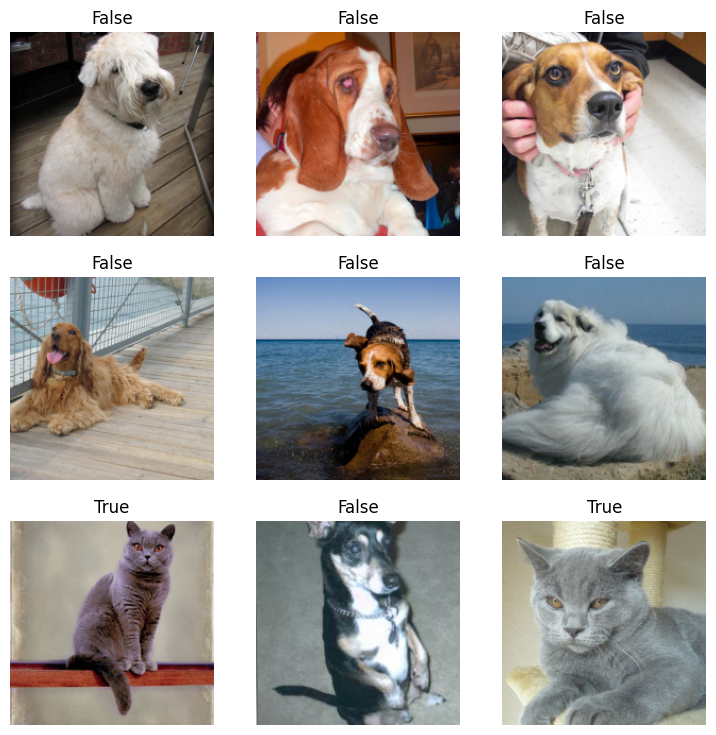

In [ ]:
dls.show_batch()

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 186MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.196178,0.039967,0.016238,00:45


epoch,train_loss,valid_loss,error_rate,time
0,0.063778,0.041571,0.012855,00:47
1,0.037551,0.031368,0.008119,00:46
2,0.017547,0.023590,0.006089,00:46


In [ ]:
learn.export('model.pkl')

## Using Gradio

In [ ]:
#|default_exp app.py

In [ ]:
#|export
from fastai.vision.all import*
import gradio as gr

def is_cat(x): return x[0].isupper()

In [ ]:
#|export
learn = load_learner('model.pkl')

In [ ]:
#|export
categories = ('Dog', 'Cat')
def classify_img(img):
    pred,pred_idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [ ]:
#|export
image = gr.Image()  # No shape argument needed
label = gr.Label()  # Use gr.Label instead of gr.outputs.Label
examples = ['dog.jpg', 'cat.jpg', 'dunno.jpg']

inf= gr.Interface(fn=classify_img, inputs=image, outputs=label, examples=examples)
inf.launch(inline=False)

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3cbf3812562d6b6739.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
# from nbdev.export import nb_export
# nb_export('/content/drive/MyDrive/path_to_your_notebook/l2-dogs_cats.ipynb')

# Personal Demo

In [3]:
!pip install -Uqq fastai 'duckduckgo_search>=6.2'
from duckduckgo_search import DDGS #DuckDuckGo has changed the api so we need to update
from fastcore.all import *
import time, json
from fastdownload import download_url
from fastai.vision.all import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 32.9 MB/s eta 0:00:00


In [4]:
def search_images(keywords, max_images=200):
    return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')

searches = 'Fish','Dolphin'
path = Path('FishOrNot')

for search in searches:
    dest = (path/search)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{search} photo'))
    time.sleep(5)
    resize_images(path/search, max_size=400, dest=path/search)

failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
print(f"Num images failed to download: {len(failed)}")

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Num images failed to download: 14


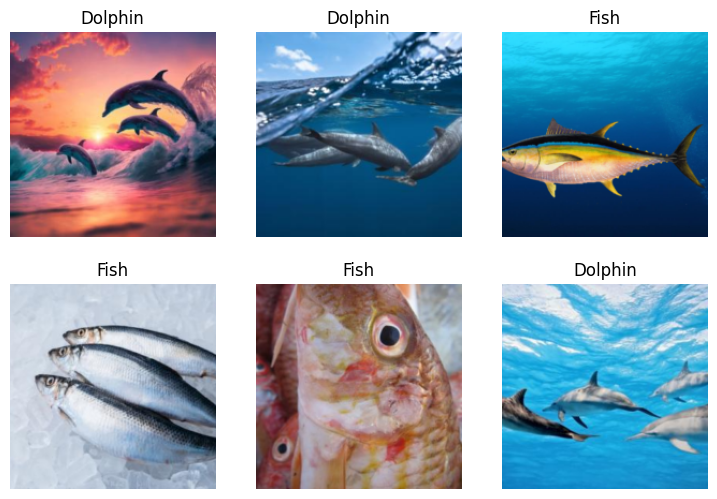

In [10]:
# ImageDataLoaders.from_name_func extracts labels using a function that operates on file names.
# This is useful when labels can be derived directly from the file name, such as when filenames contain keywords like "cat_01.jpg" or "dog_02.jpg."
# On the other hand, ImageDataLoaders.from_path_func extracts labels using a function that operates on full file paths.
# This method is ideal when labels are embedded in the directory structure, such as in folder names like /path/to/cats/cat_01.jpg.

dls = ImageDataLoaders.from_path_func('.',
    get_image_files(path),
    valid_pct=0.2,
    seed=42,
    # label_func -> A function that receives a string (the file name) and outputs a label
    label_func=parent_label,
    item_tfms=Resize(192))

dls.show_batch(max_n=6)

In [11]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 177MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.809720,0.451214,0.185714,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.187563,0.100475,0.057143,00:01
1,0.130640,0.036555,0.014286,00:01
2,0.091077,0.025983,0.014286,00:01


In [13]:
learn.export('fishDetectorModel.pkl')

In [16]:
learn = load_learner('fishDetectorModel.pkl')
labels = learn.dls.vocab
print(labels)

['Dolphin', 'Fish']


In [22]:
def classify_img(img):
    pred,pred_idx,probs = learn.predict(img)
    return dict(zip(labels, map(float,probs)))

In [ ]:
!pip install gradio
import gradio as gr

In [23]:
image = gr.Image()  # No shape argument needed
label = gr.Label()  # Use gr.Label instead of gr.outputs.Label
examples = ['fish.jpg', 'dolphin.jpg', 'dunno.jpg']

inf= gr.Interface(fn=classify_img, inputs=image, outputs=label, examples=examples)
inf.launch(inline=False, debug=True)

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://740705101bb8a08e42.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7861 <> https://740705101bb8a08e42.gradio.live
